<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/2021_04_13_linear_nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification
%matplotlib inline

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable_df = pd.DataFrame({
    "x": X[:, 0],
    "y": X[:, 1],
    "label": y 
})
X, y = make_moons(noise=0.3, random_state=0)
moons_df = pd.DataFrame({
    "x": X[:, 0],
    "y": X[:, 1],
    "label": y 
})
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
circles_df = pd.DataFrame({
    "x": X[:, 0],
    "y": X[:, 1],
    "label": y 
})
dataset_dfs = [linearly_separable_df, moons_df, circles_df] 

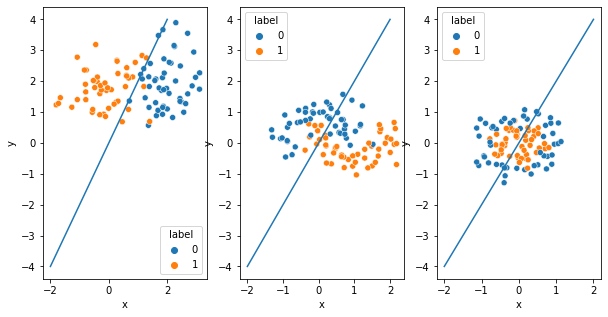

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
for dataset_df, ax in zip(dataset_dfs, axes):
    xs = np.linspace(-2, 2, 20)
    ax.plot(xs, 2*xs)
    sns.scatterplot(x="x", y="y", hue="label", data=dataset_df, ax=ax)

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

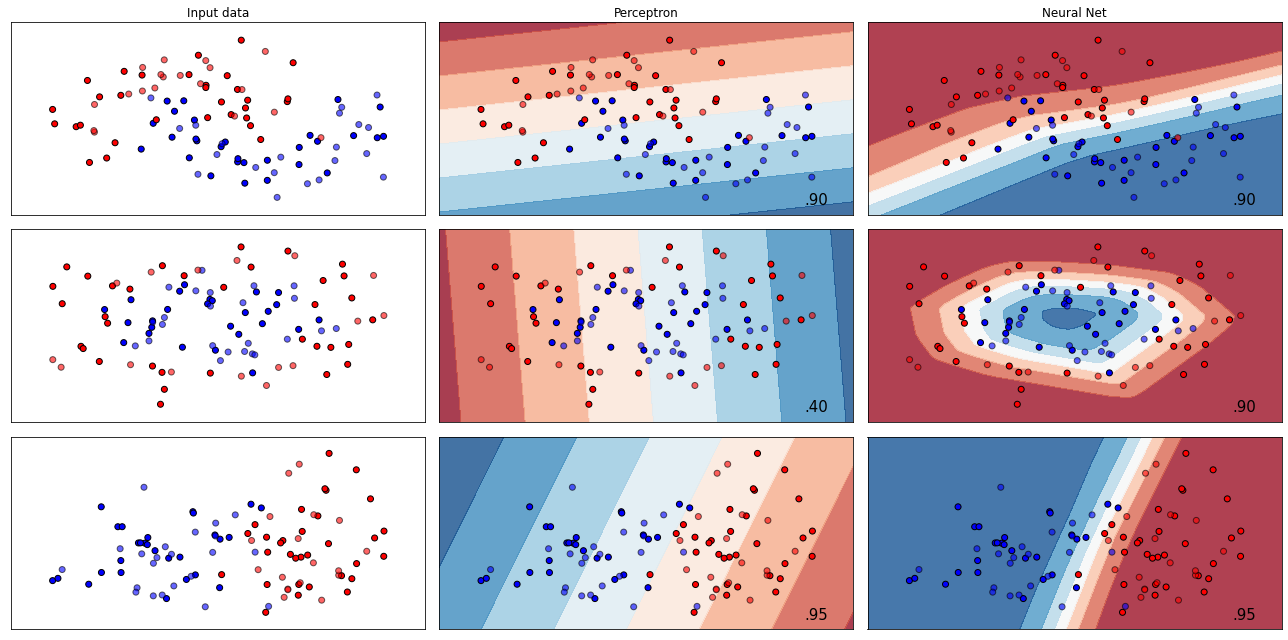

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import Perceptron
h = .02  # step size in the mesh

names = ["Perceptron", "Neural Net"]

classifiers = [
    Perceptron(tol=1e-3, random_state=0),
    MLPClassifier(alpha=1, max_iter=1000)
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(18, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

$$
y = x 
$$

In [ ]:
# ニューラルネットワークを実装してみるか？
class Layer:
    """
    ニューラルネットの各レイヤーのベースとなるクラス。以下の2つの操作を行うことができる。
    
    - 入力に対して出力を行う:          output = layer.forward(input)
    - 自身を通じた勾配の伝搬:       grad_input = layer.backward(input, grad_output)
    
    いくつかのレイヤーは学習可能なパラメータを持っており、それらはlayer.backward計算時に更新される
    """
    def __init__(self):
        """ここでは、レイヤーのパラメータ（ある場合）や補助的なものを初期化することができる。"""
        # ダミーレイヤー。何もしない
        pass
    
    def forward(self, input):
        """
        入力データを [batch, input_units] の形で受け取り、出力データ [batch, output_units] を返す。
        """
        # ダミーレイヤー。入力をそのまま出力する。
        return input

    def backward(self, input, grad_output):
        """
        与えられた入力に対して、層を介してバックプロパゲーションのステップを実行する。
        
        入力に対する損失勾配を計算するには、連鎖法則を適用する必要があります。 （誤差逆伝播）
        
        d loss / d x  = (d loss / d layer) * (d layer / d x)
        
        幸いなことに、d loss / d layerはすでに入力されているので、それにd layer / d xを掛けるだけでよい。
        レイヤーにパラメータがある場合（例：高密度レイヤー）、ここでd loss / d layerを使ってパラメータを更新する必要がある。
        """
        # ダミーレイヤーのグラデーションは、正確にはgrad_outputですが、より明確に書くと
        num_units = input.shape[1]
        d_layer_d_input = np.eye(num_units)
        return np.dot(grad_output, d_layer_d_input) # 連鎖法則

In [ ]:
class Step(Layer):
    def __init__(self):
        """

In [ ]:
# GPT-2の日本語Pretrained modelを使ったデモ

In [ ]:
!pip install transformers sentencepiece

     |████████████████████████████████| 1.2MB 11.4MB/s 


In [ ]:
from transformers import T5Tokenizer, AutoModelForCausalLM

tokenizer = T5Tokenizer.from_pretrained("rinna/japanese-gpt2-medium")

model = AutoModelForCausalLM.from_pretrained("rinna/japanese-gpt2-medium")

In [ ]:
from transformers import AutoTokenizer, AutoModel

NameError: ignored